In [ ]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda:0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/'My Drive'

/content/drive/My Drive


In [ ]:
from sketch_J.jacobian import *
from sketch_J.utils import *

In [ ]:
_,_, train_loader, test_loader = get_data(train_batch_size=200, test_batch_size=100)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
!pip install pytorchcv
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
thismodel = 'resnet20_cifar10'
model = ptcv_get_model(thismodel, pretrained=False)


In [ ]:
model = model.to("cuda")

In [ ]:
model

CIFARResNet(
  (features): Sequential(
    (init_block): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activ): ReLU(inplace=True)
    )
    (stage1): Sequential(
      (unit1): ResUnit(
        (body): ResBlock(
          (conv1): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activ): ReLU(inplace=True)
          )
          (conv2): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (activ): ReLU(inplace=True)
      )
      (unit2): ResUnit(
        (body): ResBlock(
          (co

In [ ]:
train_acc = compute_acc(model, train_loader, device)        
print(f'train ACC: {train_acc:.2f}, seed: {0}')
        
test_acc = compute_acc(model, test_loader, device)        
print(f'Test ACC: {test_acc:.2f}')

train ACC: 10.00, seed: 0
Test ACC: 10.00


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), .01, momentum=0.9, weight_decay=0)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [50, 100, 150], gamma=0.1, last_epoch=-1)

Epoch: 001/200 | Batch 000/250 | Cost: 1.5026
Epoch: 001/200 | Batch 150/250 | Cost: 1.2855


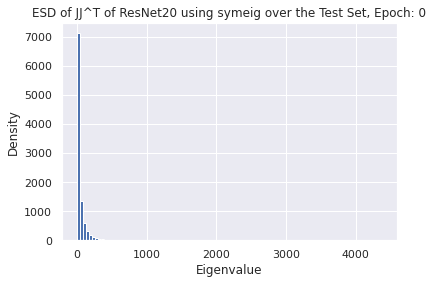

Epoch: 001/200
Train ACC: 54.10
Epoch: 002/200 | Batch 000/250 | Cost: 1.1830
Epoch: 002/200 | Batch 150/250 | Cost: 1.1211
Epoch: 002/200
Train ACC: 58.79
Epoch: 003/200 | Batch 000/250 | Cost: 0.9493
Epoch: 003/200 | Batch 150/250 | Cost: 0.9824
Epoch: 003/200
Train ACC: 64.03
Epoch: 004/200 | Batch 000/250 | Cost: 0.8441
Epoch: 004/200 | Batch 150/250 | Cost: 0.8848
Epoch: 004/200
Train ACC: 67.53
Epoch: 005/200 | Batch 000/250 | Cost: 0.8019
Epoch: 005/200 | Batch 150/250 | Cost: 0.8341
Epoch: 005/200
Train ACC: 69.41
Epoch: 006/200 | Batch 000/250 | Cost: 0.7556
Epoch: 006/200 | Batch 150/250 | Cost: 0.7762
Epoch: 006/200
Train ACC: 71.15
Epoch: 007/200 | Batch 000/250 | Cost: 0.7063
Epoch: 007/200 | Batch 150/250 | Cost: 0.7300
Epoch: 007/200
Train ACC: 72.27
Epoch: 008/200 | Batch 000/250 | Cost: 0.6421
Epoch: 008/200 | Batch 150/250 | Cost: 0.6823
Epoch: 008/200
Train ACC: 72.05
Epoch: 009/200 | Batch 000/250 | Cost: 0.6436
Epoch: 009/200 | Batch 150/250 | Cost: 0.6403
Epoch: 0

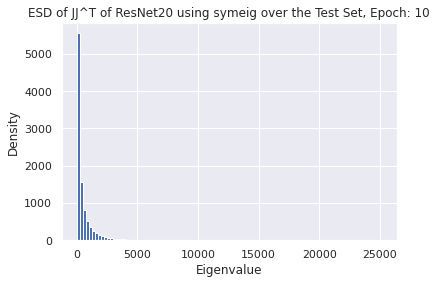

Epoch: 011/200
Train ACC: 75.92
Epoch: 012/200 | Batch 000/250 | Cost: 0.4647
Epoch: 012/200 | Batch 150/250 | Cost: 0.5031
Epoch: 012/200
Train ACC: 78.86
Epoch: 013/200 | Batch 000/250 | Cost: 0.4314
Epoch: 013/200 | Batch 150/250 | Cost: 0.4514
Epoch: 013/200
Train ACC: 73.00
Epoch: 014/200 | Batch 000/250 | Cost: 0.4300
Epoch: 014/200 | Batch 150/250 | Cost: 0.4004
Epoch: 014/200
Train ACC: 79.07
Epoch: 015/200 | Batch 000/250 | Cost: 0.3685
Epoch: 015/200 | Batch 150/250 | Cost: 0.4279
Epoch: 015/200
Train ACC: 81.11
Epoch: 016/200 | Batch 000/250 | Cost: 0.4187
Epoch: 016/200 | Batch 150/250 | Cost: 0.4369
Epoch: 016/200
Train ACC: 82.02
Epoch: 017/200 | Batch 000/250 | Cost: 0.3696
Epoch: 017/200 | Batch 150/250 | Cost: 0.3249
Epoch: 017/200
Train ACC: 79.73
Epoch: 018/200 | Batch 000/250 | Cost: 0.3955
Epoch: 018/200 | Batch 150/250 | Cost: 0.3290
Epoch: 018/200
Train ACC: 82.70
Epoch: 019/200 | Batch 000/250 | Cost: 0.3651
Epoch: 019/200 | Batch 150/250 | Cost: 0.3305
Epoch: 0

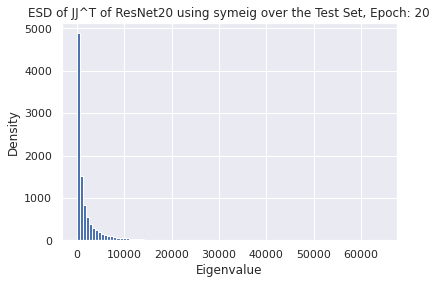

Epoch: 021/200
Train ACC: 76.09
Epoch: 022/200 | Batch 000/250 | Cost: 0.2376
Epoch: 022/200 | Batch 150/250 | Cost: 0.1799
Epoch: 022/200
Train ACC: 78.24
Epoch: 023/200 | Batch 000/250 | Cost: 0.2618
Epoch: 023/200 | Batch 150/250 | Cost: 0.2692
Epoch: 023/200
Train ACC: 80.99
Epoch: 024/200 | Batch 000/250 | Cost: 0.2115
Epoch: 024/200 | Batch 150/250 | Cost: 0.2042
Epoch: 024/200
Train ACC: 82.44
Epoch: 025/200 | Batch 000/250 | Cost: 0.1294
Epoch: 025/200 | Batch 150/250 | Cost: 0.1822
Epoch: 025/200
Train ACC: 83.53
Epoch: 026/200 | Batch 000/250 | Cost: 0.1615
Epoch: 026/200 | Batch 150/250 | Cost: 0.1600
Epoch: 026/200
Train ACC: 84.20
Epoch: 027/200 | Batch 000/250 | Cost: 0.1247
Epoch: 027/200 | Batch 150/250 | Cost: 0.2190
Epoch: 027/200
Train ACC: 86.97
Epoch: 028/200 | Batch 000/250 | Cost: 0.0841
Epoch: 028/200 | Batch 150/250 | Cost: 0.1889
Epoch: 028/200
Train ACC: 87.30
Epoch: 029/200 | Batch 000/250 | Cost: 0.0765
Epoch: 029/200 | Batch 150/250 | Cost: 0.1418
Epoch: 0

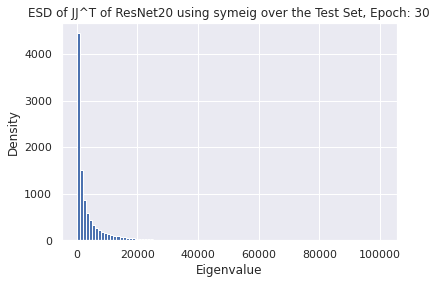

Epoch: 031/200
Train ACC: 85.97
Epoch: 032/200 | Batch 000/250 | Cost: 0.0537
Epoch: 032/200 | Batch 150/250 | Cost: 0.1101
Epoch: 032/200
Train ACC: 88.70
Epoch: 033/200 | Batch 000/250 | Cost: 0.0756
Epoch: 033/200 | Batch 150/250 | Cost: 0.1470
Epoch: 033/200
Train ACC: 93.05
Epoch: 034/200 | Batch 000/250 | Cost: 0.0746
Epoch: 034/200 | Batch 150/250 | Cost: 0.1397
Epoch: 034/200
Train ACC: 94.28
Epoch: 035/200 | Batch 000/250 | Cost: 0.0216
Epoch: 035/200 | Batch 150/250 | Cost: 0.0890
Epoch: 035/200
Train ACC: 87.70
Epoch: 036/200 | Batch 000/250 | Cost: 0.0203
Epoch: 036/200 | Batch 150/250 | Cost: 0.0929
Epoch: 036/200
Train ACC: 91.48
Epoch: 037/200 | Batch 000/250 | Cost: 0.0470
Epoch: 037/200 | Batch 150/250 | Cost: 0.0488
Epoch: 037/200
Train ACC: 90.43
Epoch: 038/200 | Batch 000/250 | Cost: 0.0479
Epoch: 038/200 | Batch 150/250 | Cost: 0.0456
Epoch: 038/200
Train ACC: 90.49
Epoch: 039/200 | Batch 000/250 | Cost: 0.0305
Epoch: 039/200 | Batch 150/250 | Cost: 0.0295
Epoch: 0

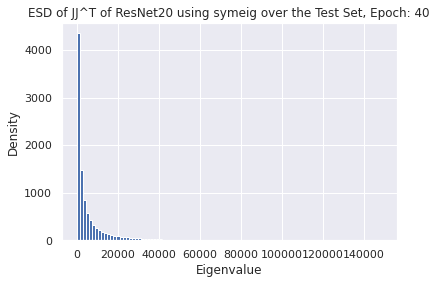

Epoch: 041/200
Train ACC: 96.66
Epoch: 042/200 | Batch 000/250 | Cost: 0.0259
Epoch: 042/200 | Batch 150/250 | Cost: 0.0191
Epoch: 042/200
Train ACC: 97.22
Epoch: 043/200 | Batch 000/250 | Cost: 0.0078
Epoch: 043/200 | Batch 150/250 | Cost: 0.0138
Epoch: 043/200
Train ACC: 98.83
Epoch: 044/200 | Batch 000/250 | Cost: 0.0242
Epoch: 044/200 | Batch 150/250 | Cost: 0.0111
Epoch: 044/200
Train ACC: 99.47
Epoch: 045/200 | Batch 000/250 | Cost: 0.0055
Epoch: 045/200 | Batch 150/250 | Cost: 0.0024
Epoch: 045/200
Train ACC: 99.85
Epoch: 046/200 | Batch 000/250 | Cost: 0.0032
Epoch: 046/200 | Batch 150/250 | Cost: 0.0026
Epoch: 046/200
Train ACC: 99.97
Epoch: 047/200 | Batch 000/250 | Cost: 0.0016
Epoch: 047/200 | Batch 150/250 | Cost: 0.0018
Epoch: 047/200
Train ACC: 99.99
Epoch: 048/200 | Batch 000/250 | Cost: 0.0007
Epoch: 048/200 | Batch 150/250 | Cost: 0.0013
Epoch: 048/200
Train ACC: 99.99
Epoch: 049/200 | Batch 000/250 | Cost: 0.0006
Epoch: 049/200 | Batch 150/250 | Cost: 0.0010
Epoch: 0

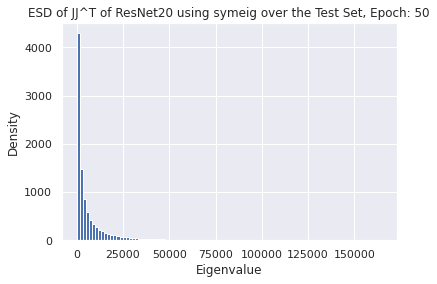

Epoch: 051/200
Train ACC: 99.99
Epoch: 052/200 | Batch 000/250 | Cost: 0.0005


KeyboardInterrupt: ignored

In [ ]:
import seaborn as sns
sns.set()

criterion = nn.CrossEntropyLoss()

cost_list = []
train_acc_list = []


epoch_max = 200

for epoch in range(epoch_max):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
    # compute output
      features, targets = features.to("cuda:0"), targets.to("cuda:0")

      output = model(features)
      loss = criterion(output, targets)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost_list.append(loss.item())
      if not batch_idx % 150:
        print (f'Epoch: {epoch+1:03d}/{epoch_max:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {loss:.4f}')
    if epoch % 10 == 0:
      model.eval()
      full_J = construct_diagJ(model, test_loader, batch_size=100, device='cuda:0') # The P100 on Colab should have enough memory to do this
      M = full_J @ full_J.t() 
      del full_J
      u, v = torch.symeig(M)
      del M
      plt.hist(u.cpu().numpy(), bins=100)
      plt.title("ESD of JJ^T of ResNet20 using symeig over the Test Set, Epoch: " + str(epoch)) 
      plt.xlabel("Eigenvalue")
      plt.ylabel("Density")
      plt.show()

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        
        train_acc = compute_acc(model, train_loader, device)        
        print(f'Epoch: {epoch+1:03d}/{epoch_max:03d}\n'
              f'Train ACC: {train_acc:.2f}')
        
        train_acc_list.append(train_acc)
        #if np.isclose(train_acc, 0.0):
          #torch.save(model.state_dict(), 'MLP_truelabels_randomseed1')
          #pass
    scheduler.step()

#np.save('cost_MLP_truelabels_randomseed1', cost_list)
#np.save('trainacc_MLP_truelabels_randomseed1', train_acc_list)

 

In [ ]:
test_acc = compute_acc(model, test_loader,device)        
print(f'Test ACC: {test_acc:.2f}')

Test ACC: 74.00
